# NOTES

In [1]:
using Plots
#using PyPlots
using StatsBase
using Distributions
using StatsFuns
using KernelDensity
using Statistics
using StatsPlots
#using PlotlyJS
using LaTeXStrings

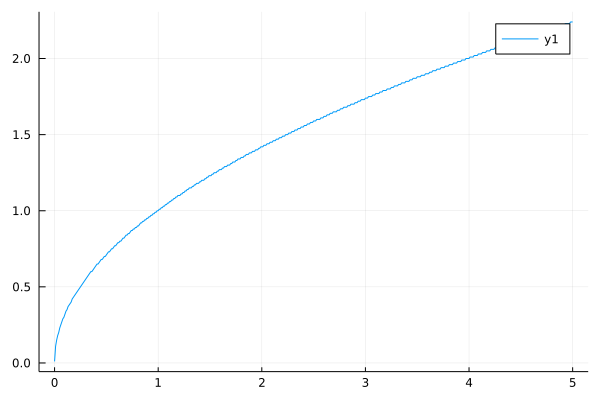

In [22]:
function inv_dist(F, x, d)
    Δ = 0
    while true
        if x < F(Δ)
            return Δ
        end
        Δ += d
    end
end

f(x) = x^2

xs = 0:0.01:5
plot(xs, inv_dist.(f, xs, 0.01))

# Cauchy

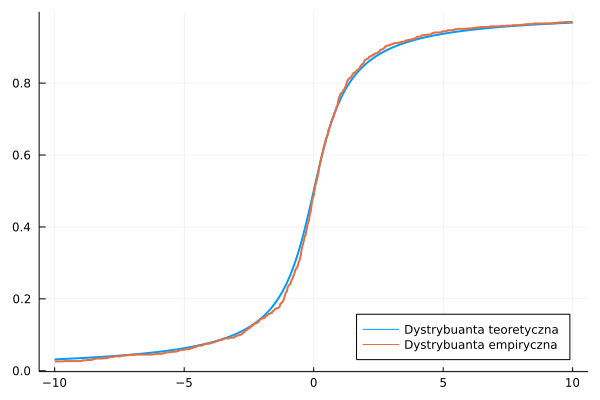

In [229]:
μ = 0
σ = 1

U = rand(Uniform(-π/2, π/2), 1000)
X = σ .* tan.(U) .+ μ
xs = -10:0.01:10
F = ecdf(X)

plot(xs, cdf.(Cauchy(μ, σ), xs), linewidth=2, label="Dystrybuanta teoretyczna")
plt1 = plot!(xs, F.(xs), linewidth=2, label="Dystrybuanta empiryczna", legend=:bottomright)

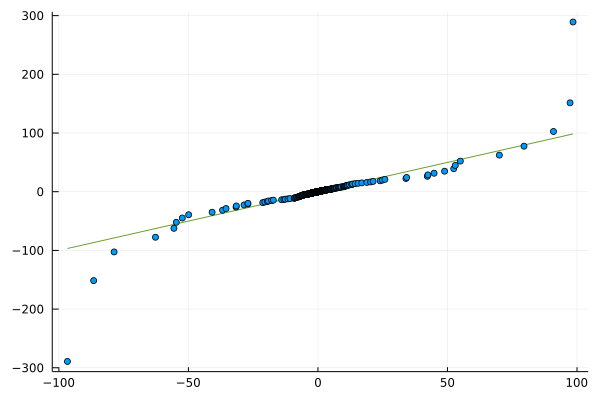

In [247]:
μ = 0
σ = 1

#U = rand(Uniform(-π/2, π/2), 1000)
#X = σ .* tan.(U) .+ μ
X = rand(Cauchy(0, 1), 1000)

us = LinRange(0.0001, 0.9999, 1000)
Y = quantile.(Cauchy(0, 1), us)
plt2 = qqplot(X[2:end-1], Y[2:end-1])

In [248]:
plt = plot(plt1, plt2, layout=(1, 2), size=(900, 400))
savefig(plot!(dpi=500), "fig_odwr2")

# Poisson

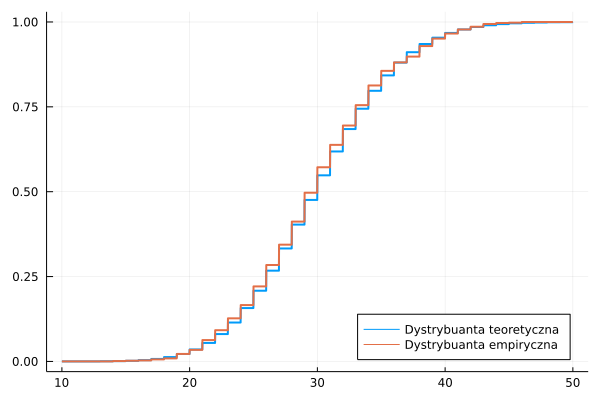

In [195]:
λ = 30

U = rand(1000)
X = quantile.(Poisson(λ), U)

us = LinRange(0.01, 0.99, 1000)
Y = quantile.(Poisson(λ), us)
#qqplot(X, Y) |> display

F = ecdf(X)
xs = 10:0.01:50
plot(xs, cdf.(Poisson(λ), xs), linewidth=2, label="Dystrybuanta teoretyczna")
plot!(xs, F.(xs), linewidth=2, label="Dystrybuanta empiryczna", legend=:bottomright)

In [196]:
savefig(plot!(dpi=500), "fig_odwr1")

# Bernoulliego

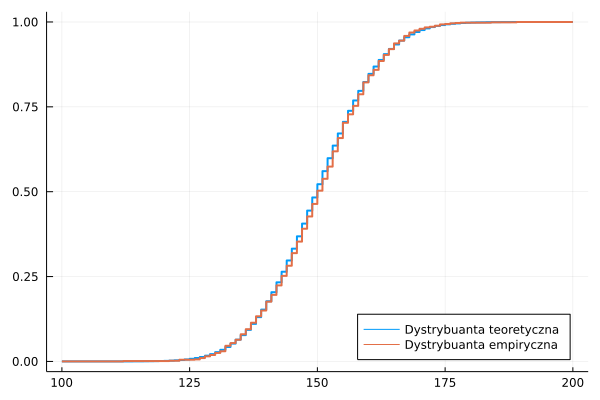

In [160]:
p = 0.3
n = 500
X = [sum(rand()<p for i in 1:n) for i in 1:1000]
F = ecdf(X)
xs = 100:0.01:200
plot(xs, cdf.(Binomial(n, p), xs), linewidth=2, label="Dystrybuanta teoretyczna", legend=:bottomright)
plt = plot!(xs, F.(xs), linewidth=2, label="Dystrybuanta empiryczna")

In [168]:
savefig(plot!(dpi=500), "fig_splot1")

# Chi-kwadrat

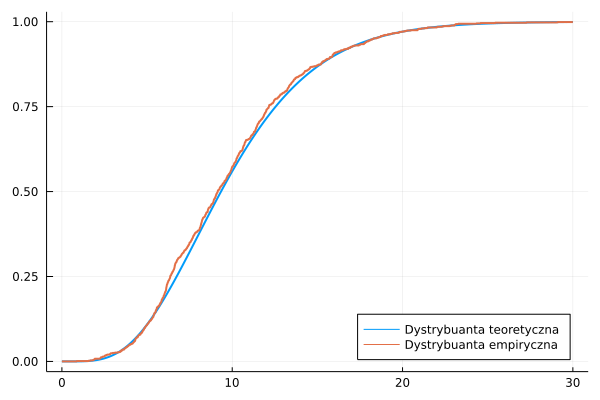

In [183]:
n = 10

X = [sum(rand(Normal(0, 1), n).^2) for i in 1:1000]
xs = 0:0.01:30
F = ecdf(X)

plot(xs, cdf.(Chisq(n), xs), linewidth=2, label="Dystrybuanta teoretyczna")
plt1 = plot!(xs, F.(xs), linewidth=2, label="Dystrybuanta empiryczna", legend=:bottomright)

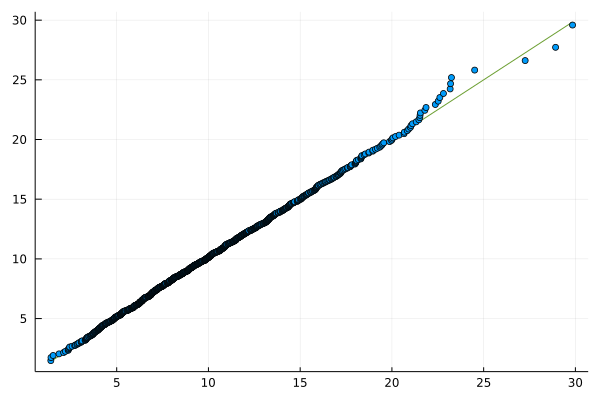

In [187]:
n = 10

X = [sum(rand(Normal(0, 1), n).^2) for i in 1:1000]

us = LinRange(0.001, 0.999, 1000)
Y = quantile.(Chisq(n), us)

plt2 = qqplot(X, Y)

In [188]:
plt = plot(plt1, plt2, layout=(1, 2), size=(900, 400))
savefig(plot!(dpi=500), "fig_splot2")

# Mieszany

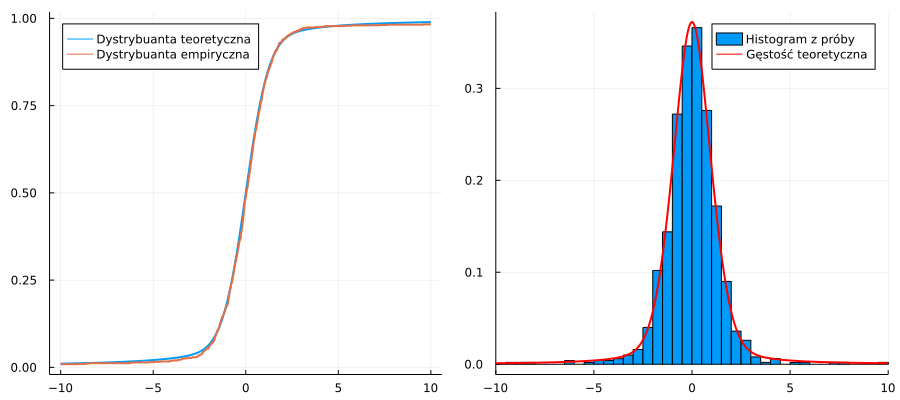

In [281]:
X = rand(Cauchy(0, 1), 1000)
Y = rand(Normal(0, 1), 1000)
I = rand(Binomial(1000, 1/3))
X = X[1:I]
Y = Y[1:1000-I]
Z = Float64[]

for i in X
    append!(Z, i)
end

for i in Y
    append!(Z, i)
end

F = ecdf(Z)
xs = -10:0.01:10
plot(xs, 1/3 .* cdf.(Cauchy(0, 1), xs) .+ 2/3 .* cdf.(Normal(0, 1), xs), linewidth=2, label="Dystrybuanta teoretyczna")
plt1 = plot!(xs, F.(xs), linewidth=2, label="Dystrybuanta empiryczna", legend=:topleft)

histogram(Z, normed=true, xlims=(-10, 10), label="Histogram z próby")
plt2 = plot!(xs, 1/3 .* pdf.(Cauchy(0, 1), xs) .+ 2/3 .* pdf.(Normal(0, 1), xs), linewidth=2, color="red", label="Gęstość teoretyczna")

plt = plot(plt1, plt2, layout=(1, 2), size=(900, 400))

In [282]:
savefig(plot!(dpi=500), "fig_komp")

# Kongruentny

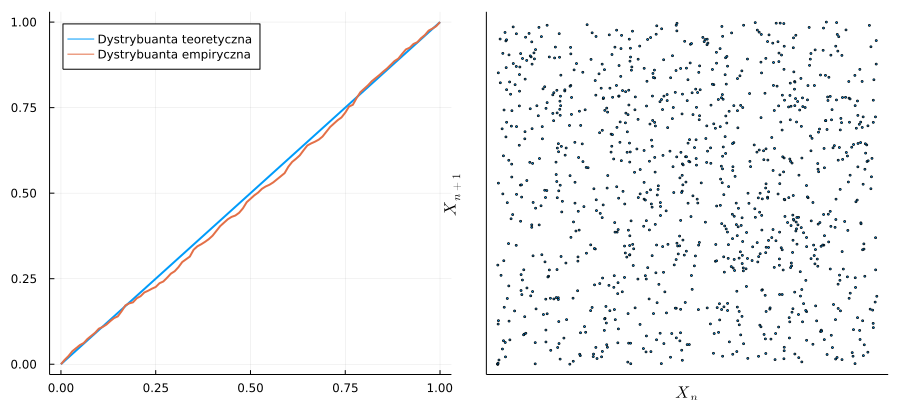

In [306]:
n = 1000
X = [1]
a = 2^16 + 3
c = 0
m = 2^31
for i in 1:n
    x = (a*X[end] + c) % m
    append!(X, x)
end

F = ecdf(X./m)
xs = 0:0.01:1
plot(x->x, xs, width=2, label="Dystrybuanta teoretyczna")
plt1 = plot!(xs, F.(xs), width=2, label="Dystrybuanta empiryczna", legend=:topleft)
plt2 = scatter(X[1:end-1], X[2:end], markersize=2, legend=false, xlabel=L"$X_n$", ylabel=L"$X_{n+1}$", ticks=false)

plt = plot(plt1, plt2, layout=(1, 2), size=(900, 400))

In [305]:
savefig(plot!(dpi=500), "fig_kongruentny1")

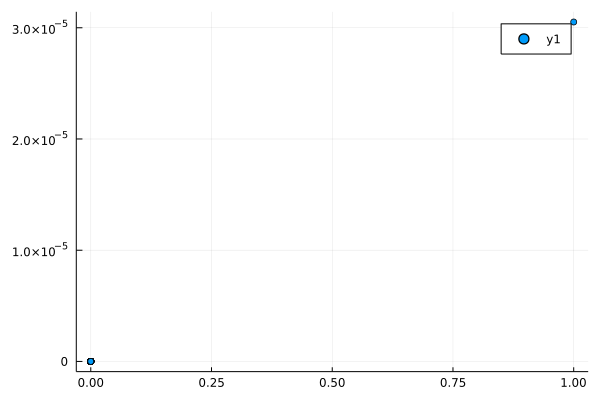

In [296]:
n = 1000
X = Float64[1]
a = 2^16 + 3
c = 0
m = 2^31
for i in 1:n
    x = (a*X[end] + c) % m
    append!(X, x/m)
end

scatter(X[1:end-1], X[2:end])

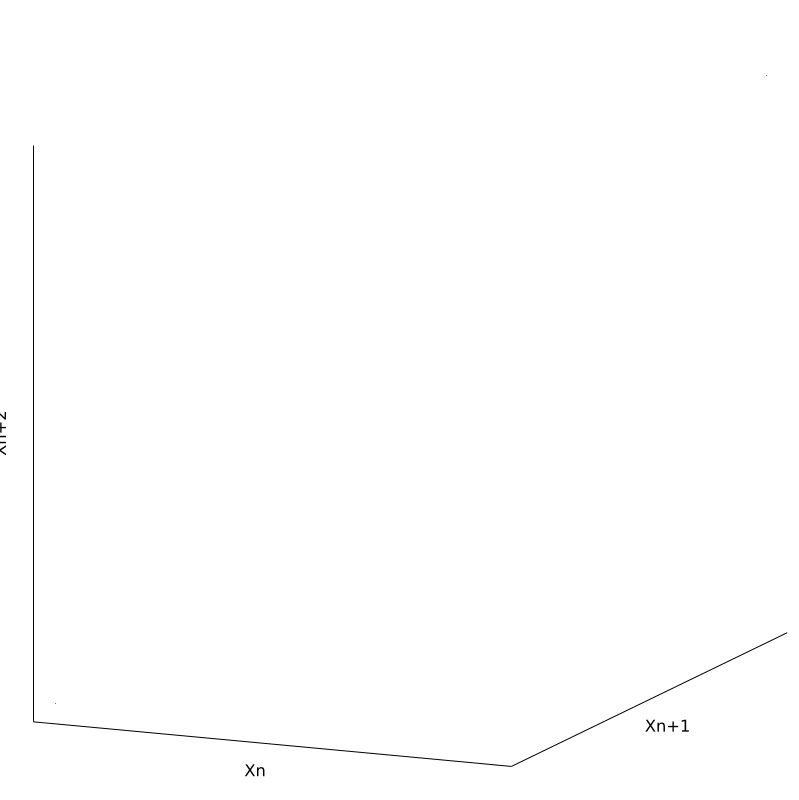

In [300]:
#plotlyjs()

n = 1000
X = Float64[1]
a = 2^16 + 3
c = 0
m = 2^31
for i in 1:n
    x = (a*X[end] + c) % m
    append!(X, x/m)
end

scatter(X[1:end-2], X[2:end-1], X[3:end], markersize=1, size=(800, 800), ticks=false, xlabel="Xn", ylabel="Xn+1", zlabel="Xn+2", legend=false)